In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('normalizedtraindata.csv')
df['totals_transactionRevenue'] = np.log(df['totals_transactionRevenue'])

C:\Users\Alizeh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


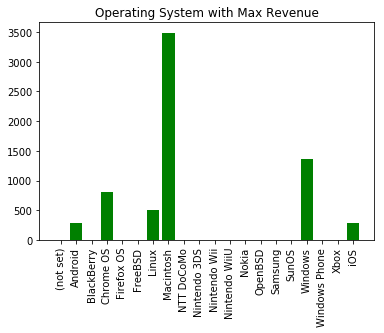

In [2]:
opsystem = df.groupby('device_operatingSystem').nunique()
dev_opsystem = opsystem[opsystem.totals_transactionRevenue == max(opsystem.totals_transactionRevenue)] #find which operating system prodcues greatest revenue
plt.bar(tuple(opsystem.device_operatingSystem.to_dict()), 'totals_transactionRevenue', data = opsystem, color = 'g')
plt.title('Operating System with Max Revenue')
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [25, 15]
plt.show()

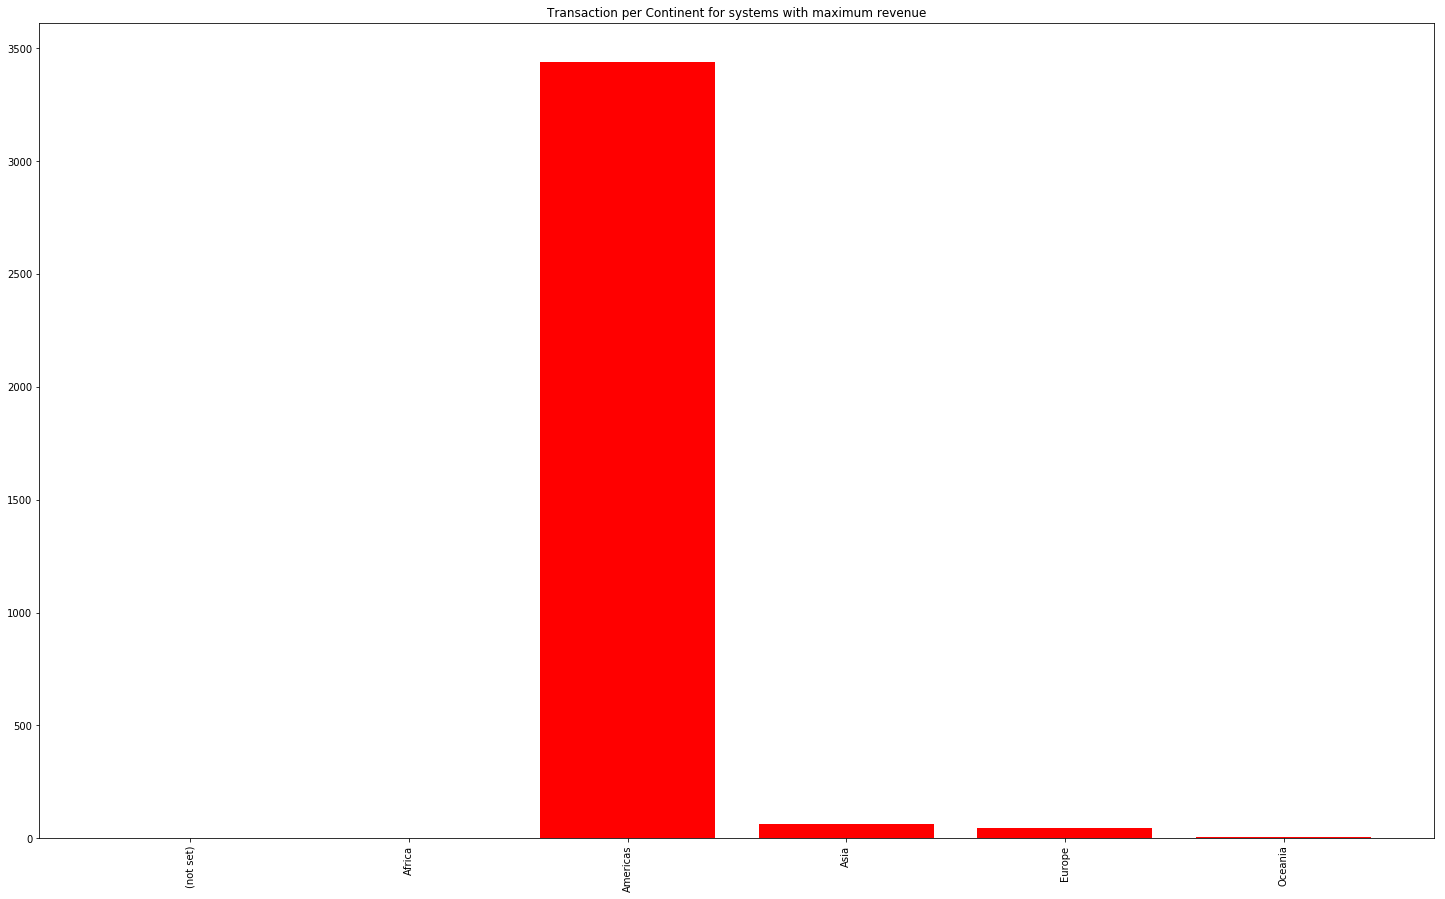

In [3]:
maxdev_ops = list(dev_opsystem.device_operatingSystem.to_dict().keys())[0]
tempgeocon = df[df.device_operatingSystem == maxdev_ops].groupby('geoNetwork_continent').nunique() #find all users of max OS by continent
con = tempgeocon[tempgeocon.totals_transactionRevenue == max(tempgeocon.totals_transactionRevenue)] #which continent has maximum revenue
maxcon = list(con.geoNetwork_continent.to_dict().keys())[0]
plt.bar(tuple(tempgeocon.geoNetwork_continent.to_dict()),'totals_transactionRevenue', data = tempgeocon, color = 'r')
plt.xticks(rotation=90)
plt.title('Transaction per Continent for systems with maximum revenue')
plt.show()

C:\Users\alize\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


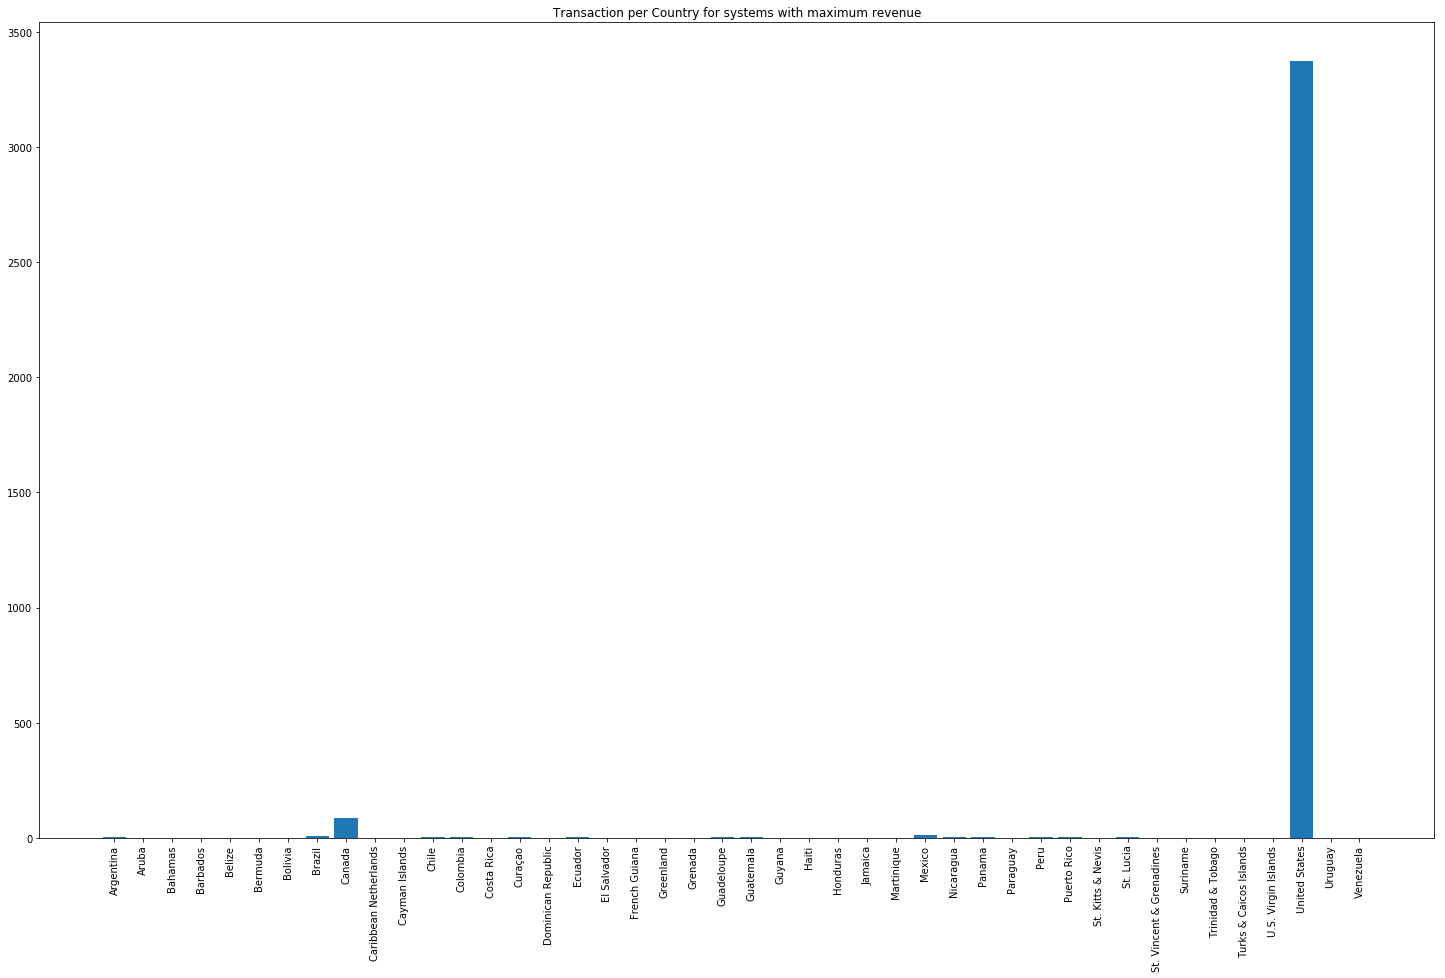

In [4]:
tempgeoCountry = df[df.device_operatingSystem == maxdev_ops][df.geoNetwork_continent == maxcon].groupby('geoNetwork_country').nunique()
country = tempgeoCountry[tempgeoCountry.totals_transactionRevenue == max(tempgeoCountry.totals_transactionRevenue)]
maxcountry = list(country.geoNetwork_country.to_dict().keys())[0]
plt.bar(tuple(tempgeoCountry.geoNetwork_country.to_dict()),'totals_transactionRevenue', data = tempgeoCountry)
plt.xticks(rotation=90)
plt.title('Transaction per Country for systems with maximum revenue')
plt.show()

C:\Users\alize\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


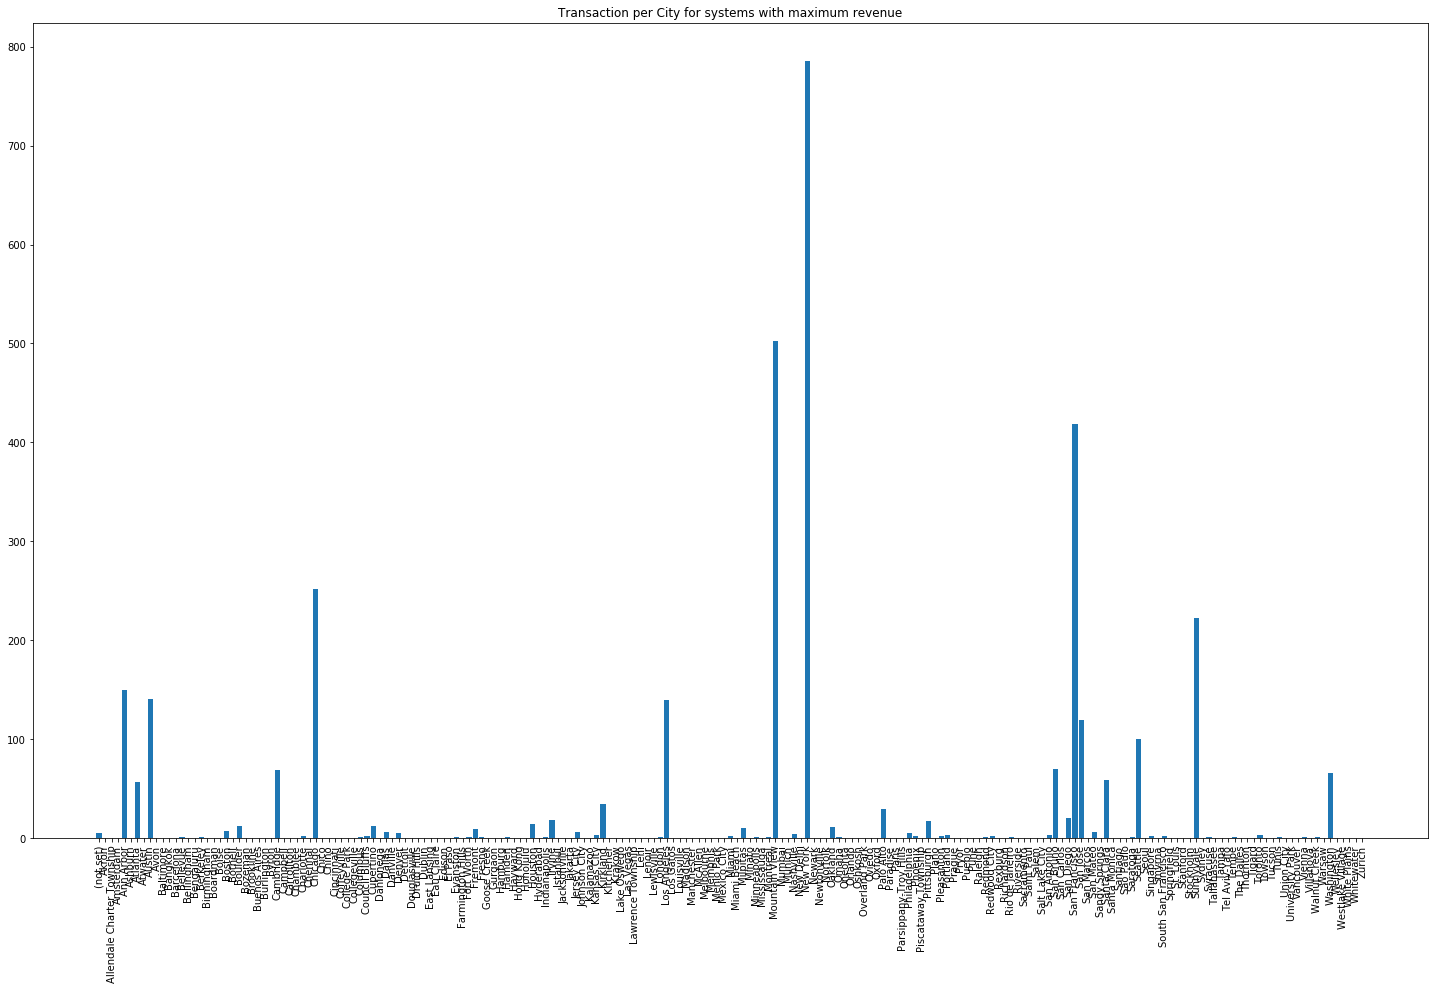

In [5]:
geoCity = df[df.device_operatingSystem == maxdev_ops][df.geoNetwork_continent == maxcon][df.geoNetwork_country == maxcountry][df.geoNetwork_city != 'not available in demo dataset'].groupby('geoNetwork_city').nunique()
city = geoCity[geoCity.totals_transactionRevenue == max(geoCity.totals_transactionRevenue)]
maxcity = list(city.geoNetwork_city.to_dict().keys())[0]
plt.bar(tuple(geoCity.geoNetwork_city.to_dict()),'totals_transactionRevenue', data = geoCity)
plt.title('Transaction per City for systems with maximum revenue')
plt.xticks(rotation=90)
plt.show()

In [6]:
print(list(tuple(geoCity.geoNetwork_city.to_dict())))
maxcity = list(city.geoNetwork_city.to_dict().keys())
print(maxcity)

['(not set)', 'Akron', 'Allendale Charter Township', 'Amsterdam', 'Ann Arbor', 'Ashburn', 'Atlanta', 'Atwater', 'Austin', 'Avon', 'Baltimore', 'Bangkok', 'Barcelona', 'Bellevue', 'Bellingham', 'Bengaluru', 'Berkeley', 'Birmingham', 'Boardman', 'Boise', 'Boston', 'Bothell', 'Boulder', 'Bozeman', 'Brookline', 'Buenos Aires', 'Burlington', 'Byron', 'Cambridge', 'Campbell', 'Carrollton', 'Chamblee', 'Charlotte', 'Chennai', 'Chicago', 'Chico', 'Chino', 'Cincinnati', 'Coffeyville', 'College Park', 'Collegeville', 'Columbus', 'Council Bluffs', 'Cupertino', 'Dahlonega', 'Dallas', 'Danville', 'Denver', 'Detroit', 'Douglasville', 'Druid Hills', 'Dublin', 'East Lansing', 'Eau Claire', 'Edison', 'El Paso', 'Evanston', 'Farmington Hills', 'Fort Worth', 'Fremont', 'Fresno', 'Goose Creek', 'Gurgaon', 'Hamburg', 'Hamden', 'Hayward', 'Hong Kong', 'Honolulu', 'Houston', 'Hyderabad', 'Indianapolis', 'Irvine', 'Istanbul', 'Jacksonville', 'Jakarta', 'Jersey City', 'Johnson City', 'Kalamazoo', 'Kansas City'

In [7]:
import folium
import pandas as pd
def built_map(filename,max_city=[]):
    map = folium.Map(location=[37.0902, -95.7129], zoom_start=5, tiles="Mapbox Bright")
    fg = folium.FeatureGroup(name="My Map")
    data = pd.read_csv(filename)
    Lat = list(data["LAT"])
    Lon = list(data["LON"])
    cities = list(data["City"])
    for lat, lon, city in zip(Lat, Lon, cities):
        if city in max_city:
            fg.add_child(folium.Marker(location=[lat, lon], popup="Largest Mac Users", icon=folium.Icon(color='red')))

        else:
            fg.add_child(folium.Marker(location=[lat, lon], popup="Mac Users", icon=folium.Icon(color='green')))
            map.add_child(fg)
    map.save("Map1.html")


print("Function done Go ahead ")


Function done Go ahead 


In [8]:
from  geopy.geocoders import Nominatim
import time
def lat_lon_to_file(cities):
    df = pd.DataFrame(columns=["City", "LAT", "LON"])
    nom = Nominatim(user_agent="my-application")
    for city in cities:
        n = nom.geocode(city)  # for single address like 3995 23rd st,San Francisco ,CA 94114
        print('Longitude : ', n.longitude)
        print('Latitude : ', n.latitude)
        time.sleep(3)
        df = df.append({"City":city, "LAT":n.latitude, "LON":n.longitude}, ignore_index=True)
    df.to_csv("Cities_Corrdinates.csv")
    return "Cities_Corrdinates.csv"

location=list(tuple(geoCity.geoNetwork_city.to_dict()))
print(location)

['(not set)', 'Akron', 'Allendale Charter Township', 'Amsterdam', 'Ann Arbor', 'Ashburn', 'Atlanta', 'Atwater', 'Austin', 'Avon', 'Baltimore', 'Bangkok', 'Barcelona', 'Bellevue', 'Bellingham', 'Bengaluru', 'Berkeley', 'Birmingham', 'Boardman', 'Boise', 'Boston', 'Bothell', 'Boulder', 'Bozeman', 'Brookline', 'Buenos Aires', 'Burlington', 'Byron', 'Cambridge', 'Campbell', 'Carrollton', 'Chamblee', 'Charlotte', 'Chennai', 'Chicago', 'Chico', 'Chino', 'Cincinnati', 'Coffeyville', 'College Park', 'Collegeville', 'Columbus', 'Council Bluffs', 'Cupertino', 'Dahlonega', 'Dallas', 'Danville', 'Denver', 'Detroit', 'Douglasville', 'Druid Hills', 'Dublin', 'East Lansing', 'Eau Claire', 'Edison', 'El Paso', 'Evanston', 'Farmington Hills', 'Fort Worth', 'Fremont', 'Fresno', 'Goose Creek', 'Gurgaon', 'Hamburg', 'Hamden', 'Hayward', 'Hong Kong', 'Honolulu', 'Houston', 'Hyderabad', 'Indianapolis', 'Irvine', 'Istanbul', 'Jacksonville', 'Jakarta', 'Jersey City', 'Johnson City', 'Kalamazoo', 'Kansas City'

In [9]:
built_map("Cities_Corrdinates.csv",maxcity)
print("Done")

Done
